In [235]:
import pandas as pd
import numpy as np

# PLOTTING
import matplotlib.pyplot as plt
#set a global label font size for all plots
plt.rc('font', size=10)
plot_colours = ['lightgreen', 'mediumturquoise', 'deepskyblue', 'cornflowerblue','mediumpurple','mediumorchid','mediumvioletred']
# seaborn and global settings
import seaborn as sns
sns.axes_style("white")
# set global pallette
sns.set_palette(sns.color_palette(plot_colours))
# 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

# MODELS 
from sklearn.cluster import KMeans, k_means

# PREPROCESSING
from sklearn.preprocessing import scale ,StandardScaler
from sklearn.preprocessing import LabelEncoder

# POST PROCESSING
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# METRICS
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [236]:
# import the dataset
original_df = pd.read_csv('customers (1).csv')
# the data after converting all the data to numerical
dummies_df= pd.read_csv('customers_dummied.csv')

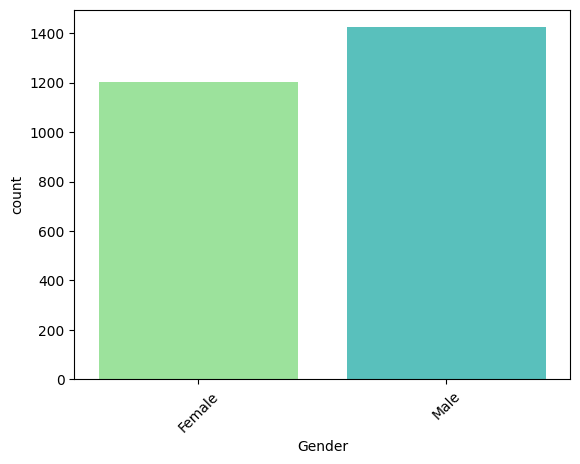

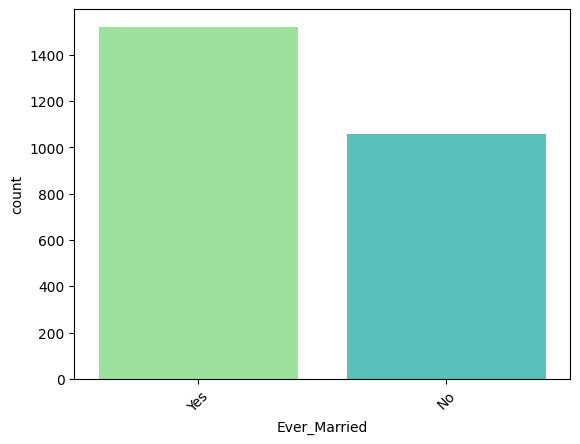

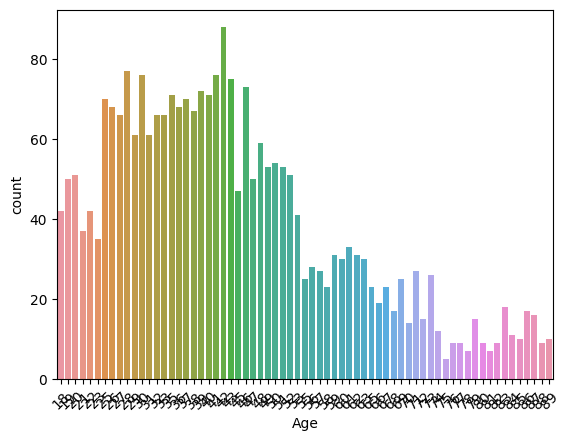

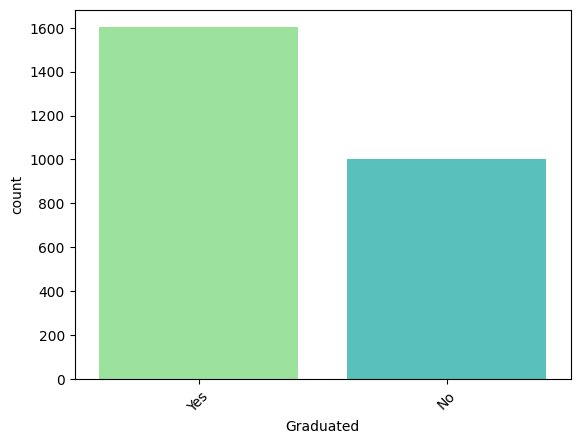

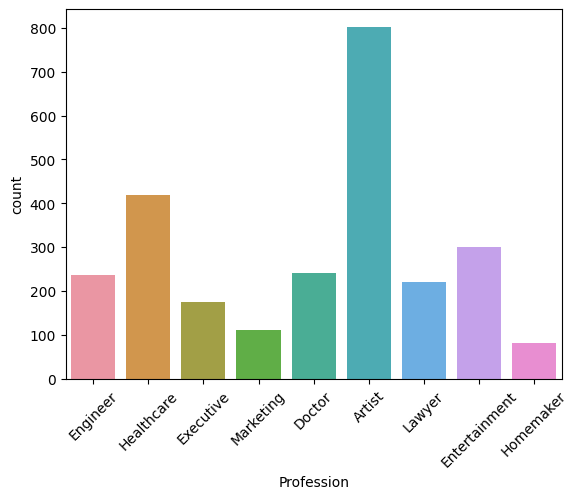

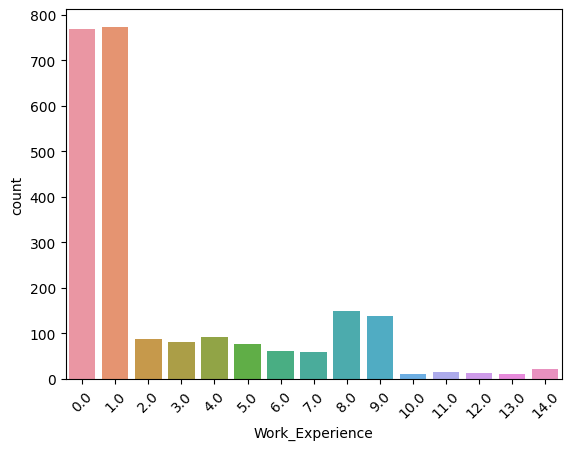

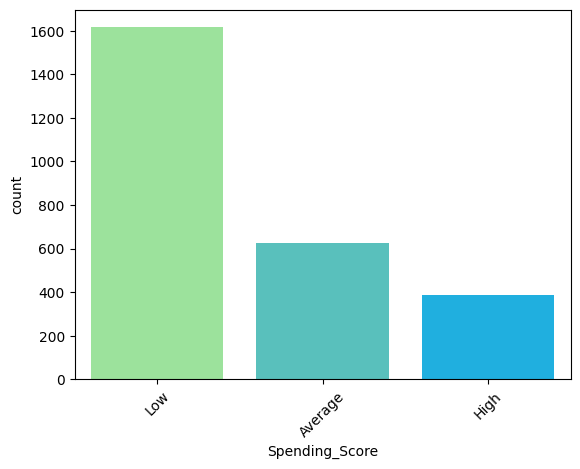

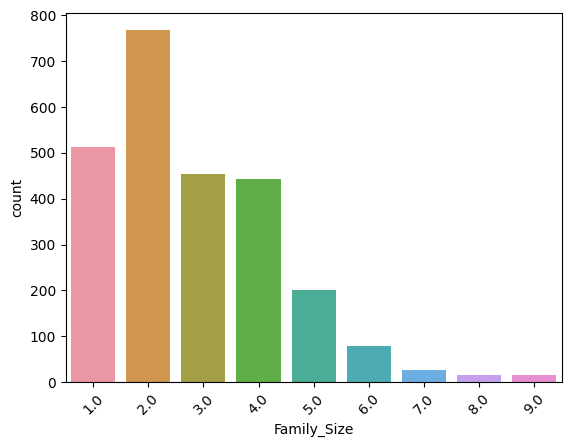

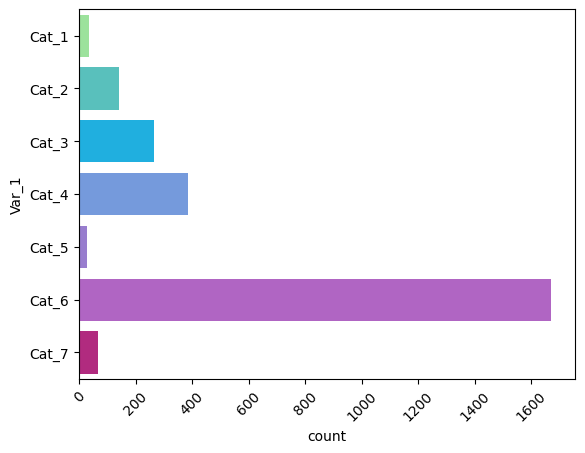

In [237]:
df_columns = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']

for f in df_columns:
    if f == 'Var_1':
        sns.countplot(y=f, data=original_df, order=['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7'])
        plt.xticks(rotation=45)
        plt.show()
    else:
        sns.countplot(x=f, data=original_df)
        plt.xticks(rotation=45)
        plt.show()

In [238]:
dummies_df.shape

(2154, 102)

### Further Processing
- Lets drop professions as described in the previous notebook. 
- this is a further step of refinement where I will see if I can reduce the amount of over all columns by combining data into logical categories like age ranges for instance. Then PCA followed by the Kmeans model. 

In [239]:
#--------------------------------------------
# AGE
#--------------------------------------------
# ages are currently in their own columns where one age is one column. This means if an age is provided that is not currentlly 
# in the dataset then the model may not know what to do with it. The distribution of ages is skewed so it could make sense to combine ages. 
# first make sure there are columns for all the ages up to the maximum
dummies_df['Age_24'] = 0
dummies_df['Age_34'] = 0
dummies_df['Age_44'] = 0
dummies_df['Age_54'] = 0
dummies_df['Age_64'] = 0

max_rows = dummies_df.shape[0]
row_range = range(0, max_rows)

def new_age_range_column(age,row_range,new_column):
    dummies_df[new_column] = 0
    for a in age: # column name
        print(a)
        for row in row_range: # row number
            old_column = 'Age_' + str(a)
            if dummies_df[old_column][row] == 1:
                dummies_df[new_column][row] = 1

def drop_old_columns(age):
    for a in age:
        old_column = 'Age_' + str(a)
        dummies_df.drop(old_column, axis=1, inplace=True)

#---------------
# 18 - 25
#---------------
new_column = 'Age_18-25'
min_age = original_df['Age'].min()
age = range(min_age, 26)

new_age_range_column(age,row_range,new_column)
drop_old_columns(age)
          
#---------------
# 26 - 35
#---------------
new_column = 'Age_26-35'
age = range(26, 36)
new_age_range_column(age,row_range,new_column)
drop_old_columns(age)

#---------------
# 36 - 45
#---------------
new_column = 'Age_36-45'
age = range(36, 46)
new_age_range_column(age,row_range,new_column)
drop_old_columns(age)

#---------------
# 46 - 55
#---------------
new_column = 'Age_46-55'
age = range(46, 56)
new_age_range_column(age,row_range,new_column)
drop_old_columns(age)

#---------------
# 56 - 70
#---------------
new_column = 'Age_56-70'
age = range(56, 71)
new_age_range_column(age,row_range,new_column)
drop_old_columns(age)

#---------------
# 71 + 
#---------------
new_column = 'Age_71+'
max_age = original_df['Age'].max()
age = range(71, max_age+1)
new_age_range_column(age,row_range,new_column)
drop_old_columns(age)


18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


In [240]:
#--------------------------------------------
# Work Experience
#--------------------------------------------

def new_work_experience_column(year,row_range,new_column):
    dummies_df[new_column] = 0
    for y in year: # column name
        print(y)
        for row in row_range: # row number
            old_column = 'Work_Experience_' + str(y)
            if dummies_df[old_column][row] == 1:
                dummies_df[new_column][row] = 1

def drop_old_work_experience_columns(year):
    for y in year:
        old_column = 'Work_Experience_' + str(y)
        dummies_df.drop(old_column, axis=1, inplace=True)
   
#---------------
# Work_Experience_0y 
#---------------
new_column = 'Work_Experience_0y'
year = [0]
new_work_experience_column(year,row_range,new_column)
drop_old_work_experience_columns(year)

#---------------
# Work_Experience_1y
#---------------
new_column = 'Work_Experience_1y'
year = [1]
new_work_experience_column(year,row_range,new_column)
drop_old_work_experience_columns(year)

#---------------
# Work_Experience_2y-5y
#---------------
new_column = 'Work_Experience_2y-5y'
year = range(2,6)
new_work_experience_column(year,row_range,new_column)
drop_old_work_experience_columns(year)

#---------------
# Work_Experience_6y-9y
#---------------
new_column = 'Work_Experience_6y-9y'
year = range(6,10) 
new_work_experience_column(year,row_range,new_column)
drop_old_work_experience_columns(year)

#---------------
# Work_Experience_10y+
#---------------
new_column = 'Work_Experience_10y+'
year = range(10,15) 
new_work_experience_column(year,row_range,new_column)
drop_old_work_experience_columns(year)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [241]:
#--------------------------------------------
# Family Size
#--------------------------------------------

def new_family_size_column(family,row_range,new_column):
    dummies_df[new_column] = 0 # create the new column and assign it a value of 0
    for f in family: # column name
        print(f)
        for row in row_range: # row number
            old_column = 'Family_Size_' + str(f) + '.0'
            if dummies_df[old_column][row] == 1:
                dummies_df[new_column][row] = 1

def drop_old_family_size_columns(family):
    for f in family:
        old_column = 'Family_Size_' + str(f) + '.0'
        dummies_df.drop(old_column, axis=1, inplace=True)
    
#---------------
# Family_Size_1
#---------------
new_column = 'Family_Size_1'
family = [1]
new_family_size_column(family,row_range,new_column)
drop_old_family_size_columns(family)

#---------------
# Family_Size_2
#---------------
new_column = 'Family_Size_2'
family = [2]
new_family_size_column(family,row_range,new_column)
drop_old_family_size_columns(family)

#---------------
# Family_Size_3
#---------------
new_column = 'Family_Size_3'
family = [3]
new_family_size_column(family,row_range,new_column)
drop_old_family_size_columns(family)

#---------------
# Family_Size_4
#---------------
new_column = 'Family_Size_4'
family = [4]
new_family_size_column(family,row_range,new_column)
drop_old_family_size_columns(family)

#---------------
# Family_Size_5+
#---------------
new_column = 'Family_Size_5+'
family = range(5,10)
new_family_size_column(family,row_range,new_column)
drop_old_family_size_columns(family)

1
2
3
4
5
6
7
8
9


In [242]:
dummies_df.shape

(2154, 27)

In [243]:
dummies_df.to_csv('customers_dummies_drop.csv', index=False)

Column Reductions: <br><br>
AGE columns have been reduced from 71 down to 6<br>
WORK EXPERIENCE columns have been reduced from 15 to 5 <br>
FAMILY SIZE columns have been reduced by 1 <br>
<br><br>
Total reduction of 74 columns 

In [244]:
features = dummies_df.columns
features

Index(['ID', 'Var_1', 'Gender_Female', 'Gender_Male', 'Ever_Married_No',
       'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes',
       'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-55', 'Age_56-70',
       'Age_71+', 'Work_Experience_0y', 'Work_Experience_1y',
       'Work_Experience_2y-5y', 'Work_Experience_6y-9y',
       'Work_Experience_10y+', 'Family_Size_1', 'Family_Size_2',
       'Family_Size_3', 'Family_Size_4', 'Family_Size_5+'],
      dtype='object')

In [245]:
# only the columns that I want to use in the model
# technically have dropped ID and Var_1
new_features = ['Gender_Female', 'Gender_Male', 'Ever_Married_No',
       'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes',
       'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-55', 'Age_56-70',
       'Age_71+', 'Work_Experience_0y', 'Work_Experience_1y',
       'Work_Experience_2y-5y', 'Work_Experience_6y-9y',
       'Work_Experience_10y+', 'Family_Size_1', 'Family_Size_2',
       'Family_Size_3', 'Family_Size_4', 'Family_Size_5+']

### Kmeans on New Dummies

In [246]:
# convert the columns to a numpy array
X = dummies_df[new_features].values
X

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 0, 0]])

In [247]:
# I am starting with 7 clusters because there are 7 unique values in the Var_1 column
kmeans_model = KMeans(n_clusters=7, random_state=0)
kmeans_model.fit(X)

KMeans(n_clusters=7, random_state=0)

In [248]:
# added the results of the kmeans model using  to the dataframe
dummies_df['Kmeans_7'] = kmeans_model.labels_

In [249]:
dummies_df['Kmeans_7'].value_counts()

3    443
2    360
1    334
6    312
5    254
4    253
0    198
Name: Kmeans_7, dtype: int64

The inertia is:  5692.4399627742205
Inertia for  2  clusters is:  7670.316052910664
Inertia for  3  clusters is:  7052.03178862292
Inertia for  4  clusters is:  6490.437572583909
Inertia for  5  clusters is:  6129.901341800667
Inertia for  6  clusters is:  5940.357925892056
Inertia for  7  clusters is:  5692.4399627742205
Inertia for  8  clusters is:  5521.508423655934
Inertia for  9  clusters is:  5279.521176432776
Inertia for  10  clusters is:  5203.414092390451
Inertia for  11  clusters is:  5029.172545481152
Inertia for  12  clusters is:  4932.020137685169
Inertia for  13  clusters is:  4821.752374336469
Inertia for  14  clusters is:  4794.438595335283
Inertia for  15  clusters is:  4651.237174606592
Inertia for  16  clusters is:  4581.96602005513
Inertia for  17  clusters is:  4486.7072239493245
Inertia for  18  clusters is:  4425.091601910586
Inertia for  19  clusters is:  4360.422337837949
Inertia for  20  clusters is:  4330.019386282206


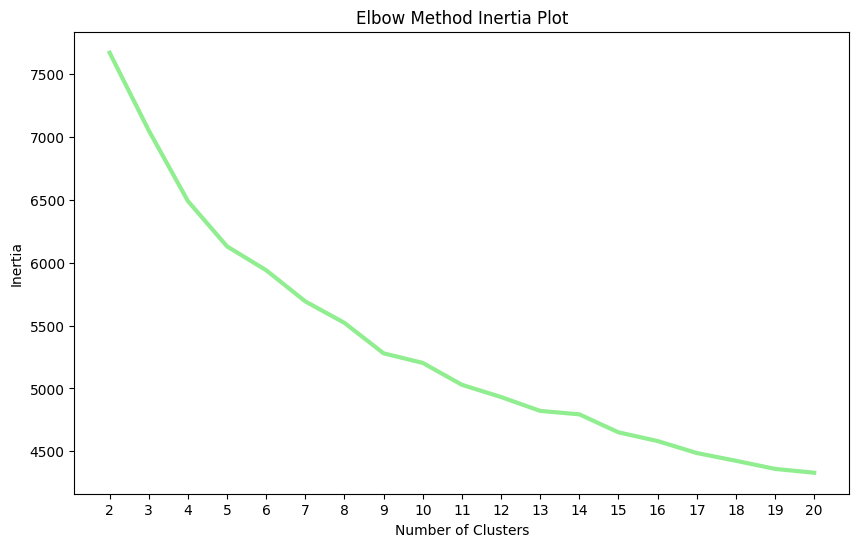

In [250]:
print('The inertia is: ', kmeans_model.inertia_)

clusters = range(2,21)
inertia = []

for k in clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(X)
    i = kmeans_model.inertia_
    inertia.append(i)
    print('Inertia for ', k, ' clusters is: ', i)

# elbow method inertia plot
fig, ax1 = plt.subplots(figsize=(10,6))
xx1 = np.arange(len(clusters))
ax1.plot(xx1, inertia, linewidth=3)
ax1.set_xticks(xx1)
ax1.set_xticklabels(clusters)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method Inertia Plot')
plt.show()

Results Analysis

---
NOTEBOOK 1: <br>
Before PCA the inertia for 7 clusters was 6394.70 <br>
After PCA the inertia for 7 clusters is 5912.39 <br>
<br>
NOTEBOOK 2:<br>
The inertia for 7 clusters is 5692.43<br>
<br>
Overall this cleanup method has resulted in the lowest inetial score. PCA on this dataset may lower it still. 

In [251]:
X.shape

(2154, 25)

### PCA

Total variance in this dataset is:  4.323811519932242
95% of the variance is:  4.10762094393563

Variance explained with 5 n_componenets:  2.443726671742229
Variance explained with 10 n_componenets:  3.4720304340577384
Variance explained with 14 n_componenets:  4.053227207625905
15 is the winner.
Variance explained with 15 n_componenets:  4.156797025149366


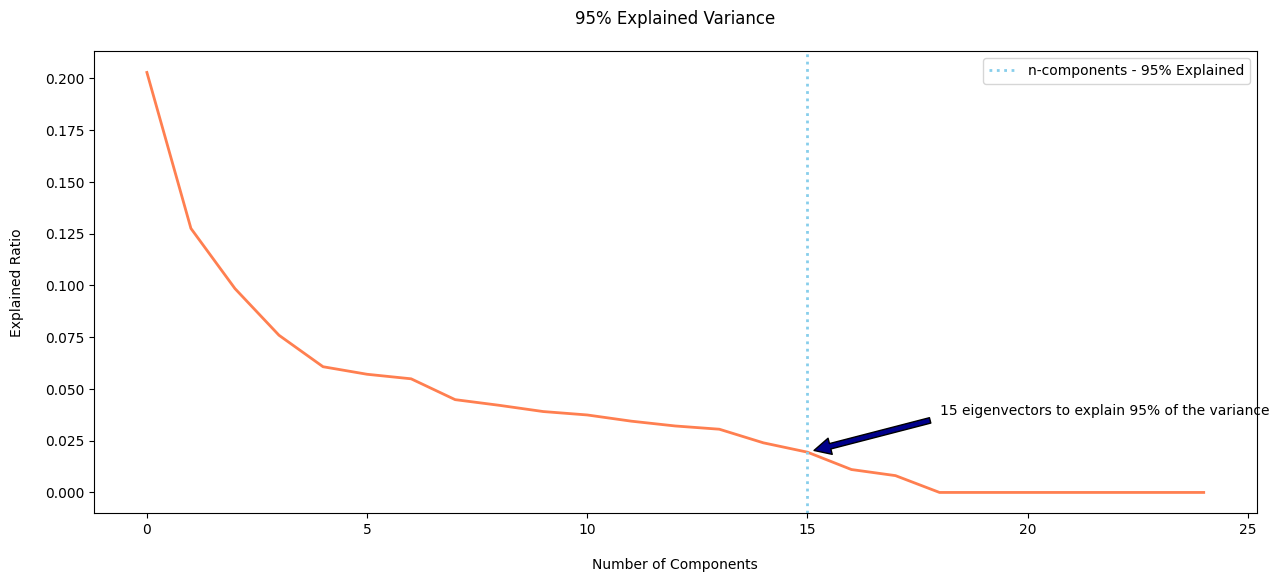

In [252]:
# the number of columns in the dataset ie the number of variables
# 25
n_components = X.shape[1]

# running PCA with all the variables
pca = PCA(n_components=n_components, random_state=0)
X_r = pca.fit(X).transform(X)

# the ideal PCA is 95% of the explained variance 
# calculating the 95% percent variance
total_variance = sum(pca.explained_variance_)
print('Total variance in this dataset is: ', total_variance)
var_95 = total_variance * 0.95
print('95% of the variance is: ', var_95)
print('')

# creating a dataframe of the components and the explained variance 
# this will save the explained variance for each component (column/variable) as a row in the dataset
a = zip(range(0,n_components+1), pca.explained_variance_)
a = pd.DataFrame(a, columns=['PCA Comp', 'Explained Variance'])

# trying to hit the 95% number shown below at about 4.31  
# sum of the first 5 components in the new dataframe
print('Variance explained with 5 n_componenets: ', sum(a['Explained Variance'][0:5]))
print('Variance explained with 10 n_componenets: ', sum(a['Explained Variance'][0:10]))
print('Variance explained with 14 n_componenets: ', sum(a['Explained Variance'][0:14]))
print('15 is the winner.')
print('Variance explained with 15 n_componenets: ', sum(a['Explained Variance'][0:15]))

# plot the data (ratio)
plt.figure(figsize=(15,6))
plt.plot(pca.explained_variance_ratio_, linewidth=2, color='coral')
plt.xlabel('Number of Components', labelpad=15)
plt.ylabel('Explained Ratio',labelpad=15)
plt.title('95% Explained Variance',pad=20)

# plot a line showing the 95% variance
plt.axvline(15, color='skyblue', linestyle=':', linewidth=2, label='n-components - 95% Explained')
plt.legend(prop=dict(size=10))

# adding an arrow 
# aogenvectors is the same as principle components
plt.annotate('15 eigenvectors to explain 95% of the variance', 
    xy = (15, pca.explained_variance_ratio_[15]), 
    # 60 is the angle of the arrow in degrees
    # the 10 is the height of the text
    xytext = (18, pca.explained_variance_ratio_[10]), 
    arrowprops = dict(facecolor = 'darkblue', shrink = 0.05),)
plt.show()

### Kmeans Using PCA and New Components Number

Inertia for  2  clusters is:  7311.5439784814525
Inertia for  3  clusters is:  6694.2626394917515
Inertia for  4  clusters is:  6134.669867477544
Inertia for  5  clusters is:  5777.096180642385
Inertia for  6  clusters is:  5582.75495826887
Inertia for  7  clusters is:  5341.674104073454
Inertia for  8  clusters is:  5132.415702453052
Inertia for  9  clusters is:  5028.132942576016
Inertia for  10  clusters is:  4759.7799762122195
Inertia for  11  clusters is:  4746.727882067984
Inertia for  12  clusters is:  4624.68456791383
Inertia for  13  clusters is:  4517.8002754170375
Inertia for  14  clusters is:  4440.494203149254
Inertia for  15  clusters is:  4343.156273930288
Inertia for  16  clusters is:  4235.885893671296
Inertia for  17  clusters is:  4197.897718333395
Inertia for  18  clusters is:  4146.910983981544
Inertia for  19  clusters is:  4046.37193329938
Inertia for  20  clusters is:  4010.9776486780006


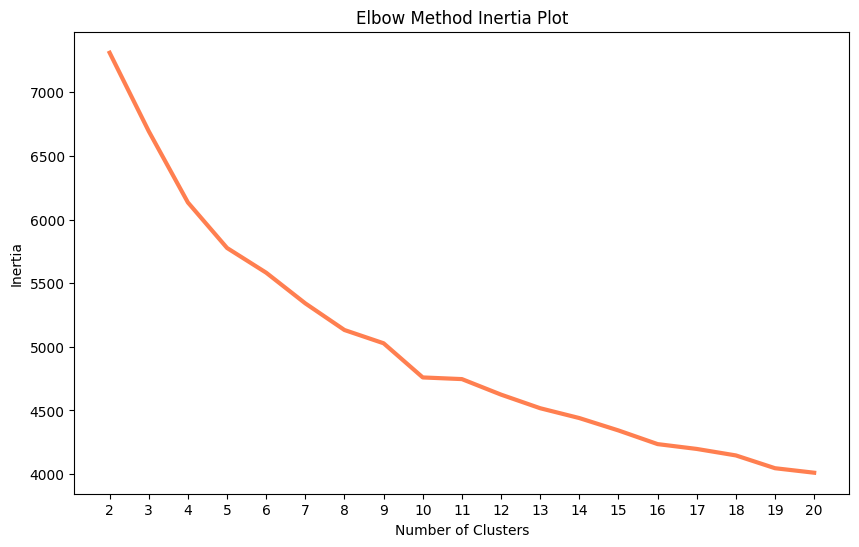

In [253]:
# run PCA again with 15 components 
pca = PCA(n_components=15, random_state=0)
X1_r = pca.fit(X).transform(X)

# Kmeans
clusters = range(2,21)
pca_inertia = []

for p in clusters:
    kmeans_model = KMeans(n_clusters=p, random_state=1)
    kmeans_model.fit(X1_r)
    i = kmeans_model.inertia_
    pca_inertia.append(i)
    print('Inertia for ', p, ' clusters is: ', i)

# plot the inertia - elbow method
fig, ax2 = plt.subplots(figsize=(10,6))
xx2 = np.arange(len(clusters))
ax2.plot(xx2, pca_inertia, linewidth=3, color='coral')
ax2.set_xticks(xx2)
ax2.set_xticklabels(clusters)
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Inertia')
ax2.set_title('Elbow Method Inertia Plot')
plt.show()

Results Analysis

---
NOTEBOOK 1: <br>
Before PCA the inertia for 7 clusters was 6394.70 <br>
After PCA the inertia for 7 clusters is 5912.39 <br>
<br>
NOTEBOOK 2:<br>
The inertia for 7 clusters is 5692.43<br>
After PCA the inertia for 7 clusters is 5341.67 <br>
<br>
95% of the variance is now:  4.10 using only 15 components whereas notebook 1's result was 4.31 with 56 components.<br>
<br>
Using the grouping cleanup method at the start and then the PCA method the final inertia value is the lowest of all. However the difference after the PCA doesnt seem to significant.  

Explained variance ratio (first two components): [0.20274764 0.12744963]
These two principal components control  33.02 % of the variance in the dataset.


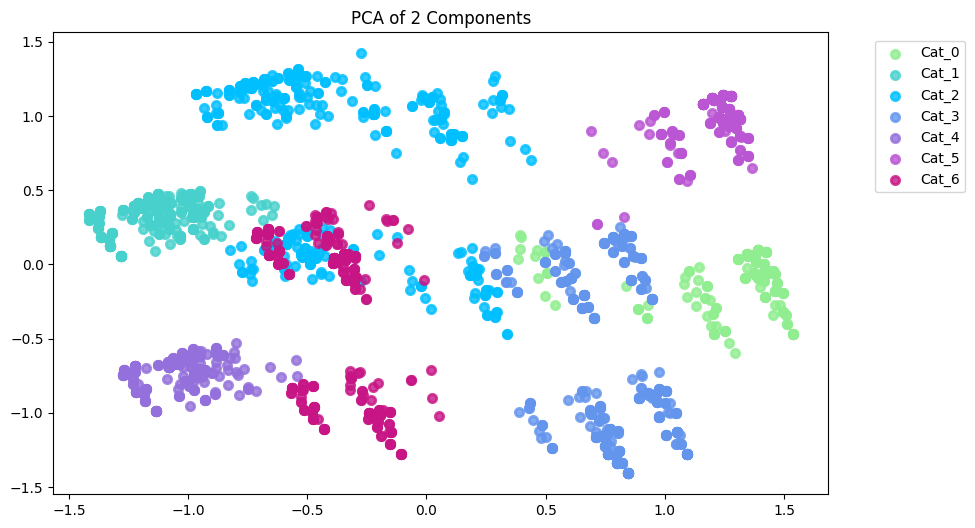

In [254]:
# visualising just two clusters
# running PCA 
# X1 is currently a numpy array with 100 variables
dummies_Y = dummies_df['Kmeans_7']

target_names = ['Cat_0', 'Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6']

# the aim is to visualise the data so we need to reduce the dimensions down to two so they can be plotted
pca = PCA(n_components=2, random_state=0)
# transforming the 100 columns down to 2
X_r = pca.fit(X).transform(X)

# percentage of variance explained for each component
components = pca.explained_variance_ratio_
print('Explained variance ratio (first two components): %s' % str(components))
print('These two principal components control ', round(sum(components)*100,2), '% of the variance in the dataset.')

# plotting the data with the first two principal components
plt.figure(figsize=(10,6))
lw = 2
alpha = 0.8
# color will be the plot_colours array that was created earlier in the first cell under matplotlib
# i will be the number of clusters [0,1,2,3,4,5,6]
# target_name will be the target_names array of what I want the clusters to be called
for color, i, target_name in zip(plot_colours, [0, 1, 2, 3, 4, 5, 6], target_names):
    # creating a scatter plot by taking the X1_r data that has been transformed down to 2 columns
    # X1_r[dummies_Y == i, 0] is the X position on the graph
    # X1_r[dummies_Y == i, 1] is the Y position on the graph
    plt.scatter(X1_r[dummies_Y == i, 0], X1_r[dummies_Y == i, 1], color=color, alpha=alpha, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
# moves the legend outside of the graph area
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('PCA of 2 Components')
plt.show()

In [255]:
# visualising just three clusters
# running PCA 
# X1 is currently a numpy array with 100 variables
dummies_Y = dummies_df['Kmeans_7']

target_names = ['Cat_0', 'Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6']

# the aim is to visualise the data so we need to reduce the dimensions down to two so they can be plotted
pca = PCA(n_components=3, random_state=0)
# transforming the all columns down to 3
X_r = pca.fit(X).transform(X)
# saving each transformed component to a variable
# these will become our axes numbers
X_ax = X_r[:,0]
Y_ax = X_r[:,1] 
Z_ax = X_r[:,2]

# printing the results
for v in pca.explained_variance_ratio_:
    print('Explained variation per principal component: {}%'.format(round(v*100,2)))

# percentage of variance explained for each component
components = pca.explained_variance_ratio_
print('These three principal components control ', round(sum(components)*100,2), '% of the variance in the dataset.')









Explained variation per principal component: 20.27%
Explained variation per principal component: 12.74%
Explained variation per principal component: 9.84%
These three principal components control  42.86 % of the variance in the dataset.


Cat_0
Cat_1
Cat_2
Cat_3
Cat_4
Cat_5
Cat_6


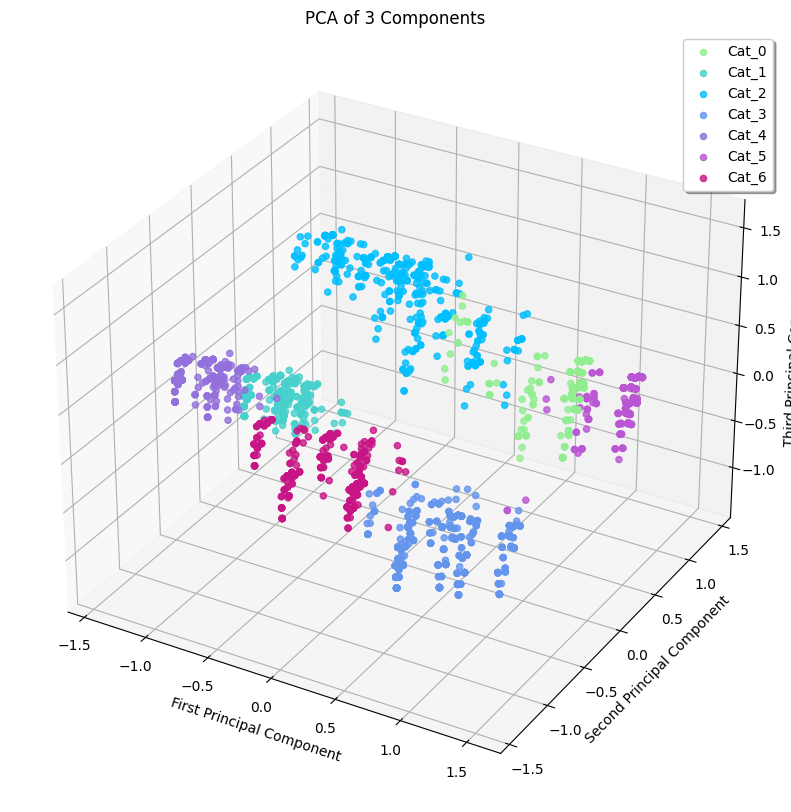

In [257]:
# plotting the data with the first two principal components
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
lw = 2
alpha = 0.8
y = dummies_Y 
plt.style.use('default')
# change the face color to white
ax.set_facecolor('white')

for l in np.unique(y):
 ix=np.where(y==l)
 print(target_names[l])
 ax.scatter(X_ax[ix], Y_ax[ix], Z_ax[ix], c=plot_colours[l], 
           label=target_names[l], alpha=alpha)
 
plt.title('PCA of 3 Components') 
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")


ax.legend(loc='best', shadow=True)